In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import zipfile
zf = zipfile.ZipFile("/gdrive/My Drive/additional/train.zip")
zf.extractall("dogcat")

In [0]:
import pandas as pd
import glob
catdf = pd.DataFrame()
fn = glob.glob("dogcat/train/cat.*.jpg")
catdf["path"] = fn
catdf["target"] = 0
dogdf = pd.DataFrame()
fn = glob.glob("dogcat/train/dog.*.jpg")
dogdf["path"] = fn
dogdf["target"] = 1
df = pd.concat([catdf, dogdf], axis=0, ignore_index=True)
df

,path,target
0,dogcat/train/cat.2428.jpg,0
1,dogcat/train/cat.8333.jpg,0
2,dogcat/train/cat.2997.jpg,0
3,dogcat/train/cat.1069.jpg,0
4,dogcat/train/cat.3391.jpg,0
5,dogcat/train/cat.249.jpg,0
6,dogcat/train/cat.7103.jpg,0
7,dogcat/train/cat.1220.jpg,0
8,dogcat/train/cat.2515.jpg,0
9,dogcat/train/cat.7994.jpg,0


In [0]:
# Dense() -> 算式
# 算式(tensor) -> tensor
# 最後: Model(input tensor, output tensor)
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
x = np.array(df["path"])
y = np.array(df["target"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat[0])

[0. 1.]


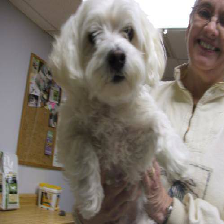

In [0]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
from keras.preprocessing.image import load_img
img = load_img(x_train[0], target_size=(224, 224))
img

In [0]:
from keras.applications.vgg16 import preprocess_input
preprocess_input(np.array(img))

array([[[-43.939003  , -53.779     , -55.68      ],
        [-44.939003  , -54.779     , -56.68      ],
        [-45.939003  , -55.779     , -57.68      ],
        ...,
        [ 20.060997  ,   9.221001  ,  36.32      ],
        [ 21.060997  ,  10.221001  ,  37.32      ],
        [ 26.060997  ,  15.221001  ,  38.32      ]],

       [[-41.939003  , -51.779     , -53.68      ],
        [-42.939003  , -52.779     , -54.68      ],
        [-43.939003  , -53.779     , -55.68      ],
        ...,
        [ 17.060997  ,   6.2210007 ,  33.32      ],
        [ 25.060997  ,  14.221001  ,  41.32      ],
        [ 33.060997  ,  22.221     ,  45.32      ]],

       [[-39.939003  , -49.779     , -51.68      ],
        [-39.939003  , -49.779     , -51.68      ],
        [-40.939003  , -50.779     , -52.68      ],
        ...,
        [ 12.060997  ,   2.2210007 ,  26.32      ],
        [ 23.060997  ,  13.221001  ,  37.32      ],
        [ 27.060997  ,  16.221     ,  39.32      ]],

       ...,

      

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
batch = 10
for i in range(5):
    print("times:", i + 1)
    idx = np.random.randint(0, x_train.shape[0], batch)
    imgs = []
    for p in x_train[idx]:
        img = load_img(p, target_size=(224, 224))
        img_pre = preprocess_input(np.array(img))
        imgs.append(img_pre)
    imgs_np = np.array(imgs)
    ts = y_train_cat[idx]
    result = cnn.train_on_batch(imgs_np, ts)
    print("train:", result)

    idx = np.random.randint(0, x_test.shape[0], batch)
    imgs = []
    for p in x_test[idx]:
        img = load_img(p, target_size=(224, 224))
        img_pre = preprocess_input(np.array(img))
        imgs.append(img_pre)
    imgs_np = np.array(imgs)
    ts = y_test_cat[idx]
    result = cnn.test_on_batch(imgs_np, ts)
    print("test:", result)

times: 1
train: [3.132796, 0.7]
test: [2.0384975e-06, 1.0]
times: 2
train: [2.8296692, 0.6]
test: [0.5494061, 0.9]
times: 3
train: [0.00011142062, 1.0]
test: [1.1920929e-07, 1.0]
times: 4
train: [1.0495101, 0.9]
test: [1.2030138, 0.9]
times: 5
train: [0.052527945, 1.0]
test: [1.1920929e-07, 1.0]


In [0]:
cnn.predict(imgs_np)

array([[1.2128776e-05, 9.9998784e-01],
       [9.6725553e-12, 1.0000000e+00],
       [9.9986207e-01, 1.3789676e-04],
       [9.9999070e-01, 9.2808932e-06],
       [7.3078453e-12, 1.0000000e+00],
       [6.1782518e-19, 1.0000000e+00],
       [2.7007317e-07, 9.9999976e-01],
       [9.9996006e-01, 3.9990027e-05],
       [9.9958199e-01, 4.1801293e-04],
       [2.3557620e-06, 9.9999762e-01]], dtype=float32)

In [0]:
idx = np.random.randint(0, x_test.shape[0], 200)
imgs = []
for p in x_test[idx]:
    img = load_img(p, target_size=(224, 224))
    img_pre = preprocess_input(np.array(img))
    imgs.append(img_pre)
imgs_np = np.array(imgs)
ts = y_test_cat[idx]
cnn.evaluate(imgs_np, ts)

200/200 [==============================] - 99s 496ms/step


[0.49855282172560694, 0.945]

In [0]:
# model比較麻煩: 沒有predict_classes
cnn.predict(imgs_np).argmax(axis=-1)